# First Deep Learning Model

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# create artificial dataset
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

print(X.shape)
X

(1000, 2)


array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

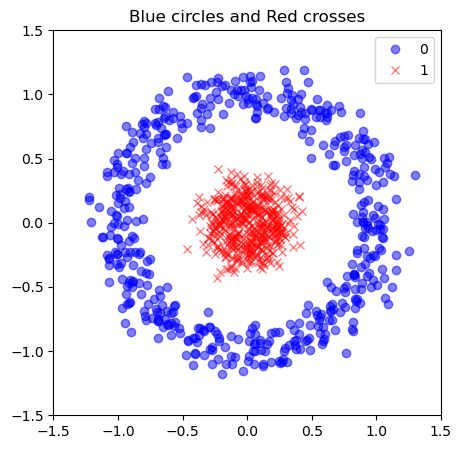

In [2]:
# explore data
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")
plt.show()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

# create model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# train model
model.fit(X, y, epochs=20)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6734 - accuracy: 0.5920
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7550
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.8300
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8540
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8620
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8720
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2931 - accuracy: 0.8940
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.9430
Epoch 9/20
32/32 [==============================] - 0s

(101, 101) (101, 101)
(10201, 2)
319/319 [==============================] - 0s 710us/step


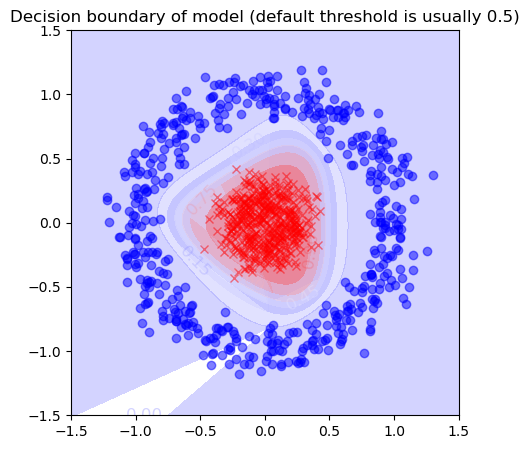

In [4]:
# evaluate prediction performance
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
print(aa.shape, bb.shape)
ab = np.c_[aa.ravel(), bb.ravel()] # ravel() flattens to 1D; c_() concatenates along a new second axis; hence ab.shape (10201, 2)
print(ab.shape)
c = model.predict(ab)
cc = c.reshape(aa.shape) # back to original shape of aa

plt.figure(figsize=(5, 5))
CS = plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2) # contourf() draws filled areas, whereas contour() draws lines; alpha is transparency
plt.clabel(CS, inline=True, fontsize=12)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5) # alpha is transparency
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title("Decision boundary of model (default threshold is usually 0.5)")
plt.show()

## Question

Why the decision boundary is different every time we restart the jupyter notebook and rerun it?